In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #import the module to perform standardization
from sklearn.decomposition import PCA #import the module to perform Principal Component Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #import package to perform Logistic Regression
from sklearn.ensemble import RandomForestClassifier #import package to perform Random Forest
from sklearn.ensemble import GradientBoostingClassifier #import package to perform Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier #import package to perform k-NN classifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [2]:
preprocessed_train_set = pd.read_csv('data/preprocessed_train_set.csv', sep=';')
train_target = pd.read_csv('data/train_target.csv', sep=';')

preprocessed_test_set = pd.read_csv('data/preprocessed_test_set.csv', sep=';')
test_target = pd.read_csv('data/test_target.csv', sep=';')

preprocessed_entire_set = pd.read_csv('data/preprocessed_entire_set.csv', sep=';')
entire_target = pd.read_csv('data/entire_target.csv', sep=';')

In [3]:
ids = ['application_id','customer_id']
train_ids = preprocessed_train_set[ids]
test_ids = preprocessed_test_set[ids]

preprocessed_train_set = preprocessed_train_set.drop(ids, 1)
preprocessed_test_set = preprocessed_test_set.drop(ids, 1)

In [4]:
%time
classifier_ls = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boosting', 'K_NN', 'XGBoost']
classifier_dc = {
    'Logistic_Regression': LogisticRegression(
        class_weight='balanced',
        solver='lbfgs',
        max_iter= 10000),
    
    'Random_Forest': RandomForestClassifier(
        n_estimators=2250, 
        max_depth=21,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight='balanced',
    max_features=6),
    
    'Gradient_Boosting': GradientBoostingClassifier(
        max_depth=5),
    
    'K_NN': KNeighborsClassifier(
        n_neighbors=5, 
        weights='distance'),
    
    'XGBoost': XGBClassifier(
        eta = 0.01,
        max_depth=9,
        base_score=0.5,
        subsample=0.7, 
        colsample_bytree=0.7,
        gamma=.3, 
        min_child_weight= 8,
        n_estimators=127,
        n_jobs=-1,
        nthread=None,
        objective = 'binary:logistic',
        eval_metric ='auc')    
}

n_trials = 5
test_size_rt = 0.2

score_ls = []
for ic, (cl_name, Classifier) in enumerate(classifier_dc.items()):
    print (ic, cl_name)
    for trial in range(n_trials):  
        
    
        temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(
            preprocessed_entire_set, 
            entire_target, 
            test_size=0.2, 
            stratify = entire_target)
        Classifier.fit(temp_X_train, np.ravel(temp_y_train))
        pred_labels = Classifier.predict(temp_X_test)
        
        roc_auc =  roc_auc_score(temp_y_test, pred_labels)
        score_ls.append([cl_name, roc_auc, 'AUC'])
        
        precision = precision_score(temp_y_test, np.ravel(pred_labels), average='binary')
        score_ls.append([cl_name, precision, 'Precision'])
        
        recall = recall_score(temp_y_test, np.ravel(pred_labels), average='binary')
        score_ls.append([cl_name, recall,'Recall'])
        
        F1 = f1_score(temp_y_test, np.ravel(pred_labels), average='binary')
        score_ls.append([cl_name, F1,'f1 Score'])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs
(0, 'Logistic_Regression')
(1, 'XGBoost')
(2, 'K_NN')
(3, 'Gradient_Boosting')
(4, 'Random_Forest')


In [5]:
metrics_df = pd.DataFrame(score_ls, columns=['Classifier','Score','Score_type'])

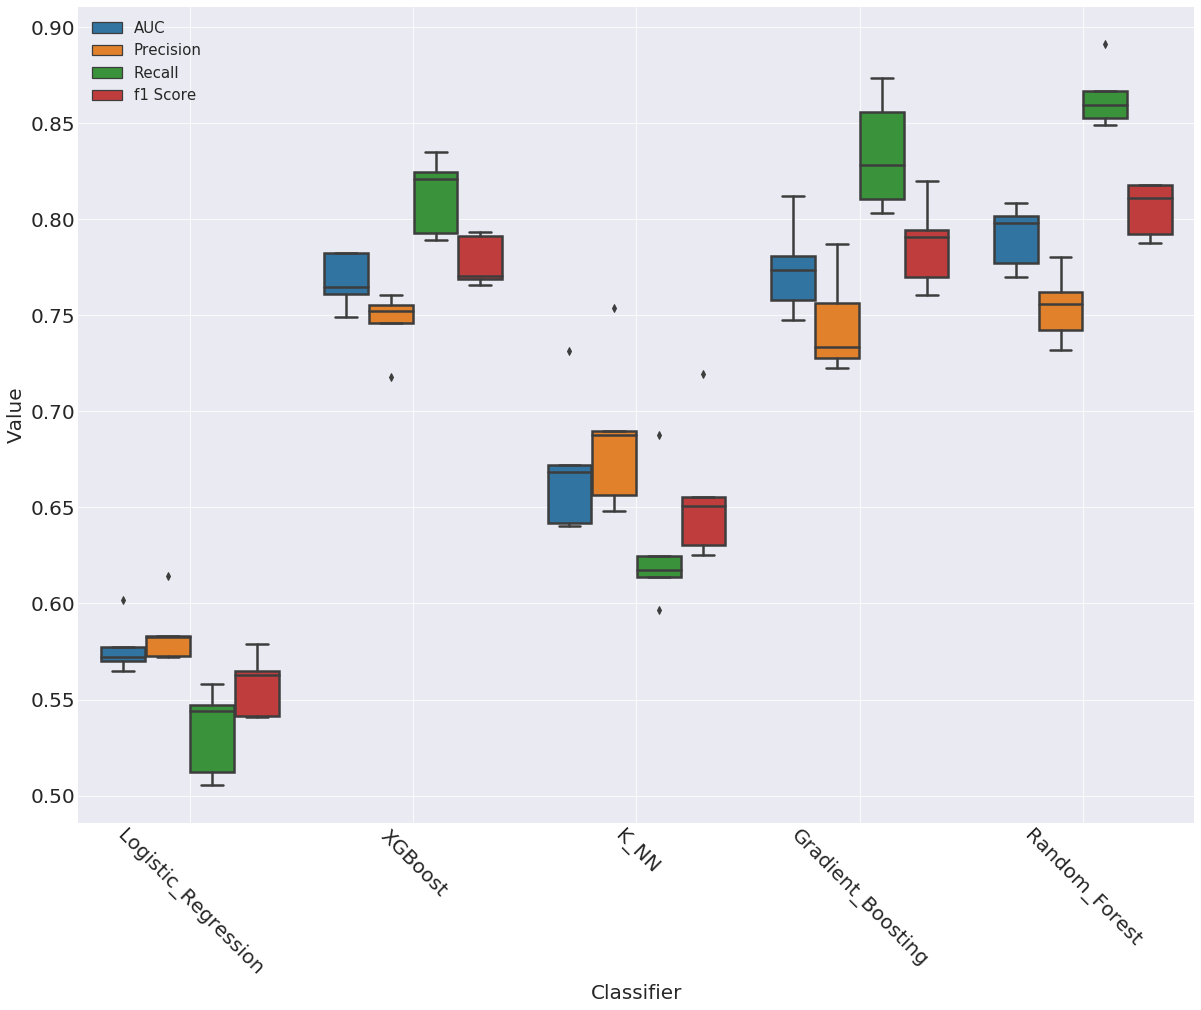

In [6]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_df, linewidth=2.5) 
ax.set_xlabel("Classifier",fontsize=20)
ax.set_ylabel("Value",fontsize=20)
plt.tick_params(labelsize=20)
plt.xticks(rotation= -45)
plt.legend(fontsize=(15))
plt.grid(True)

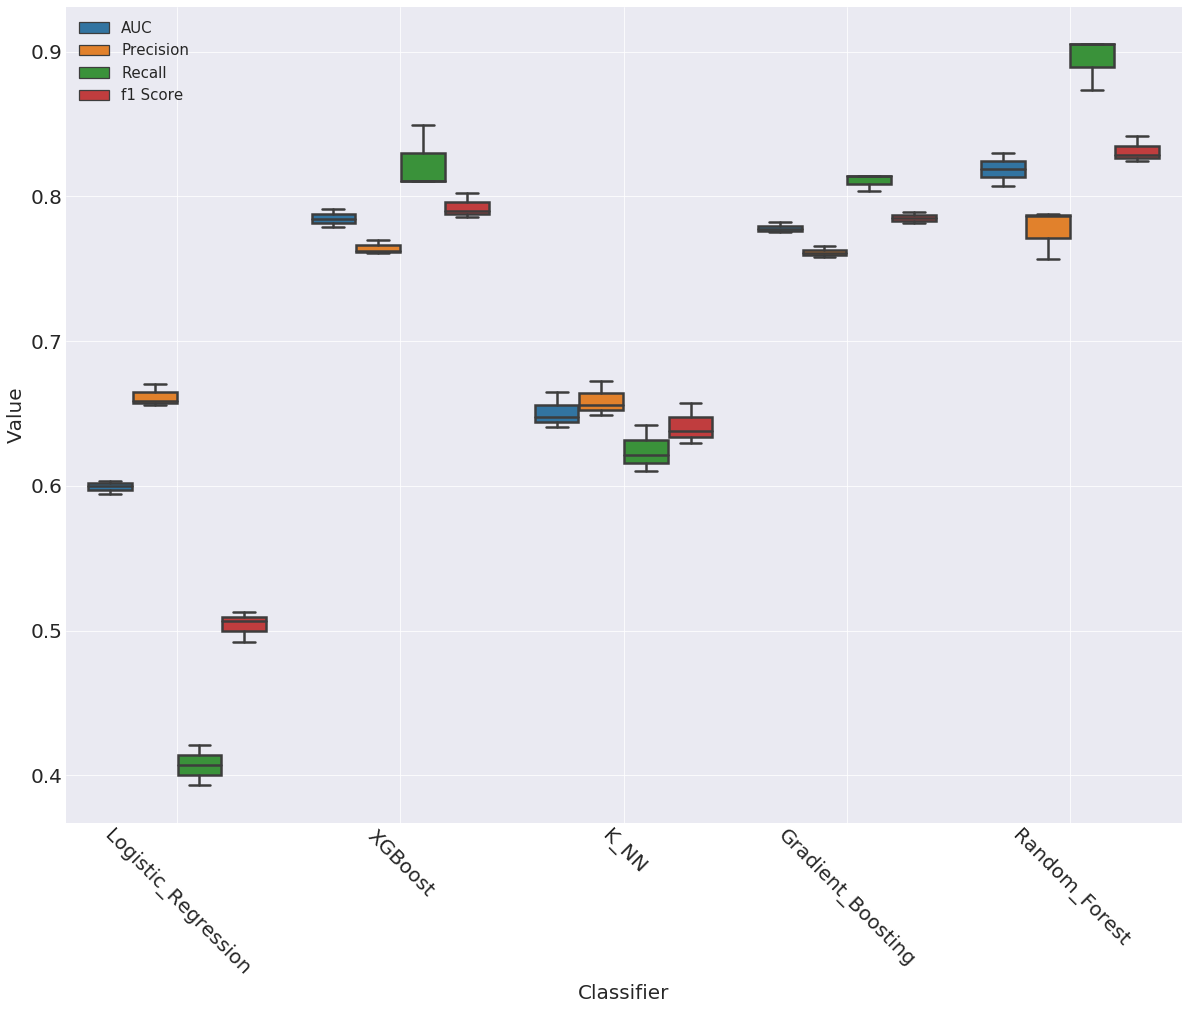

In [41]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_df, linewidth=2.5) 
ax.set_xlabel("Classifier",fontsize=20)
ax.set_ylabel("Value",fontsize=20)
plt.tick_params(labelsize=20)
plt.xticks(rotation= -45)
plt.legend(fontsize=(15))
plt.grid(True)